In [1]:
import tkinter as tk
from tkinterdnd2 import TkinterDnD, DND_FILES
from tkinter import messagebox, ttk
from PIL import Image, ImageTk
from io import BytesIO

from collections import defaultdict
import os
import numpy as np
import matplotlib.pyplot as plt

from res_enhance import run_resolution_enhancement

from lo.sdk.api.acquisition.io.open import open
from lo.sdk.api.acquisition.data.decode import SpectralDecoder
from lo.sdk.api.acquisition.data.formats import LORAWtoRGB8

In [2]:
def process_files(data_files, calibration_files, self):
    factory_cali = os.path.expanduser('LO1_calibration_files/8_5mm')
    decode = SpectralDecoder.from_calibration(factory_cali, calibration_files[0])
    for file in data_files:
        print(file)
        with open(file, mode='r') as f:
            for frame in f:
                metadata, scene_view, spectra = decode(frame, scene_decoder=LORAWtoRGB8)
                self.metadata_dict['Site'].append(file.split('/')[4].split('_')[0])
                date = file.split('/')[-1].split('-')[1]
                self.metadata_dict['Date'].append(date[:4] + '/' + date[4:6] + '/' + date[6:8])
                self.metadata_dict['Block'].append(file.split('/')[-4].split('_')[-1])
                self.metadata_dict['Treatment'].append(file.split('/')[-3])
                time = file.split('/')[-1].split('-')[2]
                self.metadata_dict['Time'].append(time[:2] + ':' + time[2:4] + ':' + time[4:6])
                if file.split('-')[-1] == 'single.loraw':
                    self.metadata_dict['Video'].append('Single')
                else:
                    self.metadata_dict['Video'].append('Video')
                self.metadata_dict['Frames'].append(len(f))
                for v in vars(metadata):
                    if v == 'wavelengths' or v == 'sampling_coordinates':
                        continue
                    self.metadata_dict[v].append(getattr(metadata, v))
                self.scene_v.append(scene_view)
        
                break
    messagebox.showinfo("Processing Complete", "Your files have been processed!")
    return self.metadata_dict, self.scene_v



/Volumes/LaCie/Living_Optics_hyperspec_Josh/Wytham_raw_data/2024_06_27/BLOCK_B/NPK/Data/Bkbnpkq2CA-20240627-114001-108267.loraw
['Wytham', '2024/06/27', 'B', 'NPK', '11:40:01', 'Video', '39', '4384', '96', '2048', '2432', '3', '2553', '422062', '2000000', '2000', '0', '2000', '0', '0', '-511167884', '1.4.3', 'cal-85-56-1001231129-20240501-152449-000000', 'uint8', 'float32', '']
Running resolution enhancement in homography mode.
Total number of frames in the file: 39


 13%|█▎        | 5/39 [00:02<00:18,  1.88it/s]

Frame 4 failed, skipping.


 21%|██        | 8/39 [00:04<00:15,  1.99it/s]

Frame 7 failed, skipping.


 41%|████      | 16/39 [00:07<00:11,  2.09it/s]

Frame 15 failed, skipping.


 46%|████▌     | 18/39 [00:08<00:09,  2.10it/s]

Frame 17 failed, skipping.


 49%|████▊     | 19/39 [00:09<00:09,  2.06it/s]

Frame 18 failed, skipping.


 54%|█████▍    | 21/39 [00:10<00:08,  2.06it/s]

Frame 20 failed, skipping.


 56%|█████▋    | 22/39 [00:10<00:08,  2.06it/s]

Frame 21 failed, skipping.


 59%|█████▉    | 23/39 [00:11<00:07,  2.06it/s]

Frame 22 failed, skipping.


 62%|██████▏   | 24/39 [00:11<00:07,  2.08it/s]

Frame 23 failed, skipping.


 69%|██████▉   | 27/39 [00:13<00:05,  2.03it/s]

Frame 26 failed, skipping.


 72%|███████▏  | 28/39 [00:13<00:05,  2.02it/s]

Frame 27 failed, skipping.


 74%|███████▍  | 29/39 [00:14<00:04,  2.02it/s]

Frame 28 failed, skipping.


 79%|███████▉  | 31/39 [00:15<00:04,  2.00it/s]

Frame 30 failed, skipping.


 85%|████████▍ | 33/39 [00:16<00:02,  2.00it/s]

Frame 32 failed, skipping.


 87%|████████▋ | 34/39 [00:16<00:02,  2.01it/s]

Frame 33 failed, skipping.


 90%|████████▉ | 35/39 [00:17<00:02,  1.97it/s]

Frame 34 failed, skipping.


 92%|█████████▏| 36/39 [00:17<00:01,  1.98it/s]

Frame 35 failed, skipping.


 95%|█████████▍| 37/39 [00:18<00:01,  1.99it/s]

Frame 36 failed, skipping.


100%|██████████| 39/39 [00:19<00:00,  2.01it/s]


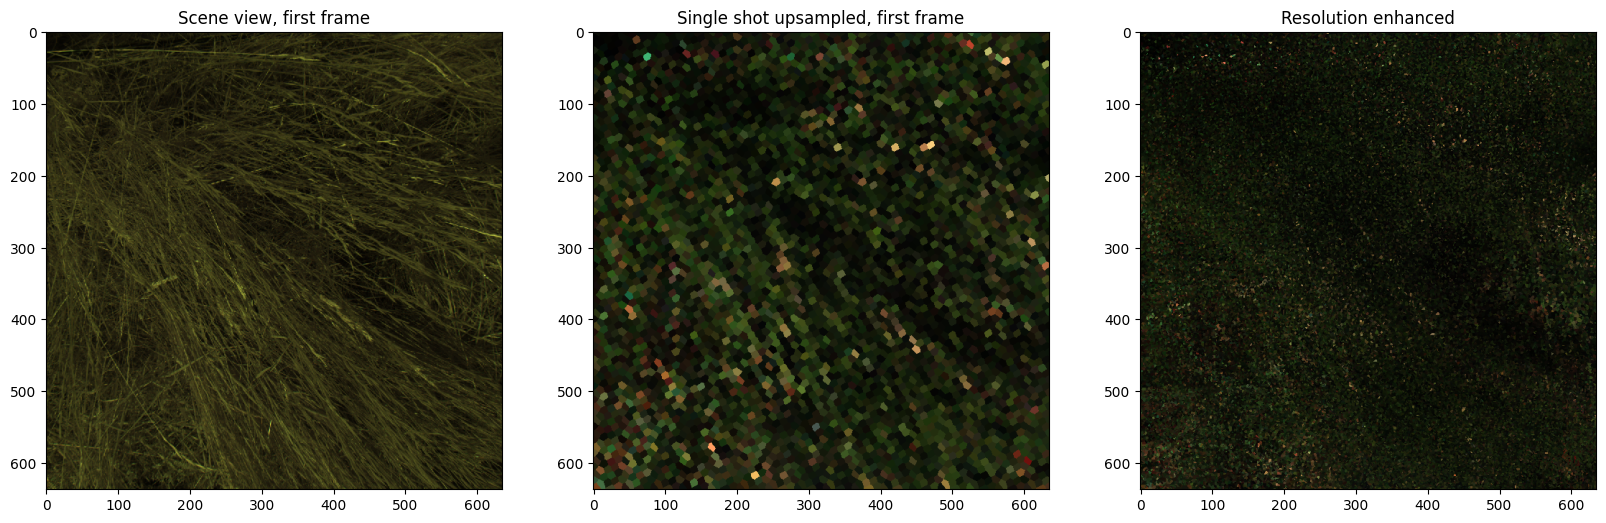

/Volumes/LaCie/Living_Optics_hyperspec_Josh/Wytham_raw_data/2024_06_26/BLOCK_B/DIST/Data/BkBdistQ2CA-20240626-123552-705704.loraw
['Wytham', '2024/06/26', 'B', 'DIST', '12:35:52', 'Video', '63', '4384', '96', '2048', '2432', '3', '1724', '832279', '2000000', '2000', '0', '2000', '0', '0', '-511167884', '1.4.3', 'cal-85-56-1001231129-20240501-152449-000000', 'uint8', 'float32', '']
Running resolution enhancement in homography mode.
Total number of frames in the file: 63


100%|██████████| 63/63 [00:34<00:00,  1.81it/s]


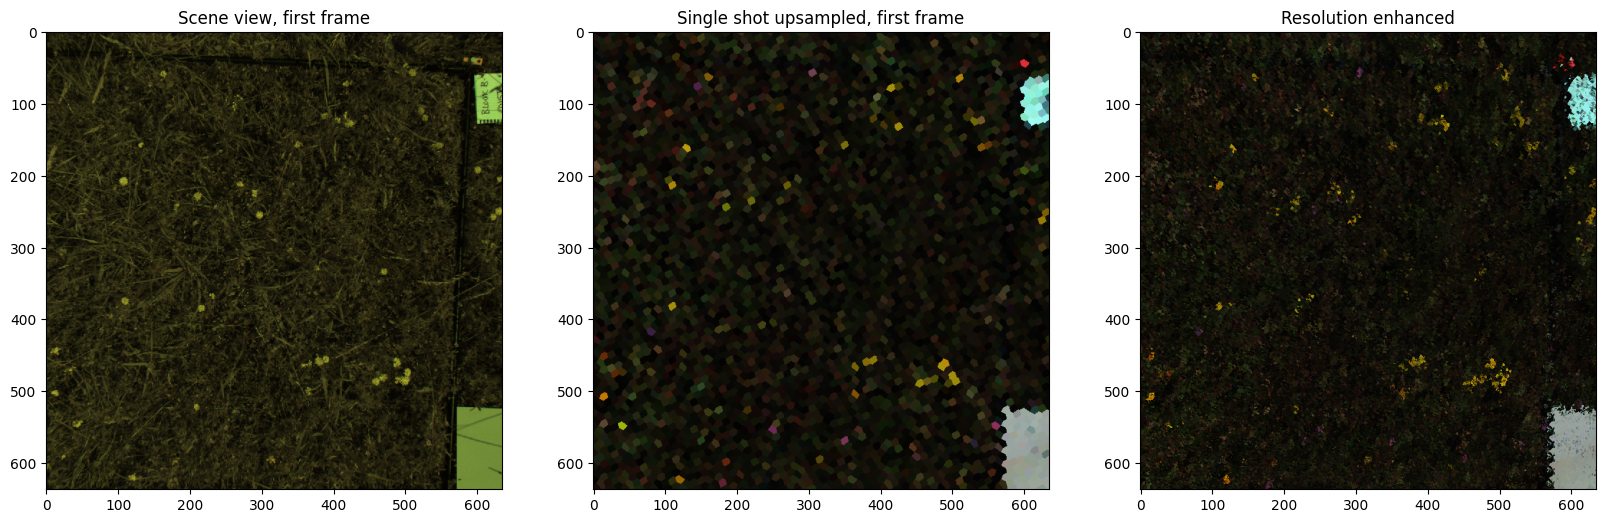

In [3]:
# GUI Setup
class FileDropApp(TkinterDnD.Tk):
    def __init__(self):
        super().__init__()

        self.title("Metadata GUI")
        self.geometry("1500x1000")

        # Create a Canvas widget
        self.left_canvas = tk.Canvas(self)
        self.left_canvas.pack(side = 'left', fill="both", expand=True)

        # Create a Canvas widget
        self.right_canvas = tk.Canvas(self)
        self.right_canvas.pack(side = 'right', fill="both", expand=True)

        # Add a vertical Scrollbar to the Canvas
        self.scrollbar = tk.Scrollbar(self.right_canvas, command=self.right_canvas.yview)
        self.scrollbar.pack(side="right", fill="y")

        # Configure the Canvas to work with the Scrollbar
        self.right_canvas.config(yscrollcommand=self.scrollbar.set)

        # Create a Frame inside the Canvas to hold the content
        self.right_frame = tk.Frame(self.right_canvas)
        self.right_canvas.create_window((0, 0), window=self.right_frame, anchor="nw")

        self.left_frame = tk.Frame(self.left_canvas)
        self.left_canvas.create_window((0, 0), window=self.left_frame, anchor="nw")

        self.right_frame.update_idletasks()
        self.right_canvas.config(scrollregion=self.right_canvas.bbox("all"))

        # Label for Data Files Drop Area
        self.data_label = tk.Label(self.left_frame, text="Drop Data Files Here", relief="ridge", width=80, height=8)
        self.data_label.pack(pady=10, padx=10)

        # Enable drag-and-drop for the Data Files label
        self.data_label.drop_target_register(DND_FILES)
        self.data_label.dnd_bind('<<Drop>>', self.on_data_drop)

        # Label for Calibration Files Drop Area
        self.calibration_label = tk.Label(self.left_frame, text="Drop Calibration File Here", relief="ridge", width=80, height=8)
        self.calibration_label.pack(pady=10, padx=10)

        # Enable drag-and-drop for the Calibration Files label
        self.calibration_label.drop_target_register(DND_FILES)
        self.calibration_label.dnd_bind('<<Drop>>', self.on_calibration_drop)

        # Button to Process Files
        self.process_button = tk.Button(self.left_frame, text="Find Metadata and Show Image", command=self.process_files)
        self.process_button.pack(pady=0)

        # Button to save metadata to csv
        self.save_metadata = tk.Button(self.left_frame, text="Save Metadata", command=self.save_metadata)
        self.save_metadata.pack(pady=10)

        # Create a frame to hold the buttons
        self.button_frame = tk.Frame(self.left_frame)
        self.button_frame.pack(pady=20)  # Add some vertical padding

        # Button to clear data files
        self.clear_data_button = tk.Button(self.button_frame, text="Clear Data", command=self.clear_data, width=9, height=2)
        self.clear_data_button.grid(row=0, column=0, padx=10)

        # Button to clear calibration files
        self.clear_cali_button = tk.Button(self.button_frame, text="Clear Calibration", command=self.clear_calibration, width=9, height=2)
        self.clear_cali_button.grid(row=0, column=1, padx=10)

        # Button to resolution enhance
        self.resol_enhance = tk.Button(self.left_frame, text="Enhance Resolution", command=self.resol_enhancer)
        self.resol_enhance.pack(pady=10)

        # Store dropped file paths
        self.data_files = []
        self.calibration_files = []
        self.metadata_dict = defaultdict(list)
        self.scene_vs = []
        self.scene_v = []

        # Create a placeholder for the table
        self.table_frame = None
        self.image_frame = None

        # Button to clear table files
        self.clear_table_button = tk.Button(self.button_frame, text="Clear Table", command=self.clear_table, width=9, height=2)
        self.clear_table_button.grid(row=0, column=2, padx=10)

        # Button to clear pictures files
        self.clear_pics_button = tk.Button(self.button_frame, text="Clear Pictures", command=self.clear_pics, width=9, height=2)
        self.clear_pics_button.grid(row=0, column=3, padx=10)

    def on_data_drop(self, event):
        # Append new files to the existing list
        new_files = self.tk.splitlist(event.data)
        self.data_files.extend(new_files)
        # Update label to show all dropped files
        self.data_label.config(text="\n".join(self.data_files))

    def on_calibration_drop(self, event):
        # Append new files to the existing list
        new_files = self.tk.splitlist(event.data)
        self.calibration_files.extend(new_files)
        # Update label to show all dropped files
        self.calibration_label.config(text="\n".join(self.calibration_files))

    def process_files(self):
        if not self.data_files or not self.calibration_files:
            messagebox.showwarning("Missing Files", "Please drop both data files and calibration files before processing.")
            return
        
        # Call the processing function with the dropped files
        Metadata, self.scene_vs = process_files(self.data_files, self.calibration_files, self)

        # Create a blank table to show in the GUI
        self.show_table(Metadata)
        self.show_image(self.scene_vs)
    
    def clear_data(self):

        self.data_files = []
        self.data_label.config(text="Drop Data Files Here")
        
    def clear_calibration(self):

        self.calibration_files = []
        self.calibration_label.config(text="Drop Calibration File Here")

    def save_metadata(self):
        import pandas as pd
        metadata_df = pd.DataFrame(self.metadata_dict)
        metadata_df.to_csv('metadata_gui.csv', index=False)
        messagebox.showinfo("Save Complete", "Your metadata has been saved to metadata_gui.csv")
    
    def resol_enhancer(self):
        
        for i in self.data_files:
            if i.split('-')[-1] == 'single.loraw':
                messagebox.showwarning("Resolution Enhancement", "Resolution enhancement is only available for video files.")
                break
            else:
                decode = SpectralDecoder.from_calibration(os.path.expanduser('LO1_calibration_files/8_5mm'), self.calibration_files[0])
                messagebox.showinfo("Resolution Enhancement", "Resolution enhancement is in progress. This may take a few minutes.")
                im = run_resolution_enhancement(i, decode, 'all', 3)
                data = np.array(im)
                data = data[:,:,95]
                self.scene_vs.append(data)

        self.show_image(self.scene_vs)
            
        
    def show_table(self, metadata_dict):
        # Remove the old table if it exists
        if self.table_frame:
            self.table_frame.destroy()

        # Create a new frame for the table
        self.table_frame = tk.Frame(self.left_frame, width=500)
        self.table_frame.pack(pady=20, padx=10)

        # Create a Treeview widget for the table
        columns = (list(metadata_dict.keys()))
        self.table = ttk.Treeview(self.table_frame, columns=columns, show="headings", height=20)
        # Define the column headers
        for col in columns:
            self.table.heading(col, text=col)
            self.table.column(col, width = 30, minwidth = 100, stretch = True)

        # Add the data to the table
        for i in range(len(metadata_dict['Site'])):
            values_list = list(metadata_dict.values())
            print(list(np.array(values_list)[:, i]))
            self.table.insert("", "end", values=(list(np.array(values_list)[:, i])))

        # Add a scrollbar to the table
        scrollbar = ttk.Scrollbar(self.table_frame, orient="vertical", command=self.table.yview)
        self.table.configure(yscrollcommand=scrollbar.set)
        scrollbar.pack(side="right", fill="y")

        scrollbar_x = ttk.Scrollbar(self.table_frame, orient="horizontal", command=self.table.xview)
        self.table.configure(xscrollcommand=scrollbar_x.set)
        scrollbar_x.pack(side="bottom", fill="x")
 
        # Add the table to the GUI
        self.table.pack()

    def show_image(self, scene_vs):

        # Remove the old table if it exists
        if self.image_frame:
            self.image_frame.destroy()

        self.image_frame = tk.Frame(self.right_frame)
        self.image_frame.pack(pady=20, padx=10)
        photo = []
        for i in range(len(scene_vs)):
            buf = BytesIO()
            plt.figure()
            plt.imshow(scene_vs[i])
            # Save the plot to a BytesIO object
            plt.savefig(buf, format='png')
            plt.close()  # Close the plot to free up memory
            buf.seek(0)  # Move to the beginning of the BytesIO object

            # Open the image with PIL and convert to ImageTk format
            pillow = Image.open(buf)
            photo.append(ImageTk.PhotoImage(pillow))
            # Generate the plot and display it
            self.pic = tk.Label(self.image_frame, image = photo[i], height = 450, width = 550)
            self.pic.pack(pady=20)
            self.pic.image = photo[i]
        # Update the Canvas scroll region to match the size of the Frame
        self.right_frame.update_idletasks()
        self.right_canvas.config(scrollregion=self.right_canvas.bbox("all"))
    
    def clear_table(self):
        if self.table_frame:
            self.table_frame.destroy()
        self.metadata_dict = defaultdict(list)

    def clear_pics(self):
        if self.image_frame:
            self.image_frame.destroy()
        self.scene_vs = []
        self.scene_v = []
        


if __name__ == "__main__":
    app = FileDropApp()
    app.mainloop()